## Implementing market basket analysis using Apriori Algorithm

### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

### Importing the Dataset

In [2]:
data = pd.read_csv('store_data.csv')

In [3]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The NaN tells us that the item represented by the column was not purchased in that specific transaction.

In this dataset there is no header row. But by default, pd.read_csv function treats first row as header. To get rid of this problem, add header=None option to pd.read_csv function, as shown below:

In [4]:
data = pd.read_csv('store_data.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(7501, 20)

### Data Preprocessing

Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists:

In [7]:
records = []
for i in range(0, 7501):
    records.append([str(data.values[i,j]) for j in range(0, 20)])

In [8]:
records[0:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

### Applying Apriori

In [9]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
results = list(association_rules)

In [10]:
len(results)

48

In [11]:
print(results[0])

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


In [12]:
# putting output into a pandas dataframe
def tables(results):
    item1         = [tuple(result[2][0][0])[0] for result in results]
    item2         = [tuple(result[2][0][1])[0] for result in results]
    support    = [result[1] for result in results]
    confidence = [result[2][0][2] for result in results]
    lift       = [result[2][0][3] for result in results]
    return list(zip(item1, item2, support, confidence, lift))
output_DataFrame = pd.DataFrame(tables(results), columns = ['Item 1', 'Item 2', 'Support', 'Confidence', 'Lift'])

In [13]:
output_DataFrame

,Item 1,Item 2,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,herb & pepper,ground beef,0.015998,0.323450,3.291994
4,tomato sauce,ground beef,0.005333,0.377358,3.840659
5,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
6,pasta,shrimp,0.005066,0.322034,4.506672
7,light cream,chicken,0.004533,0.290598,4.843951
8,chocolate,shrimp,0.005333,0.232558,3.254512
9,ground beef,spaghetti,0.004799,0.571429,3.281995


In [14]:
# Displaying the results sorted by descending order of Lift column

output_DataFrame.nlargest(n = 10, columns = 'Lift')

,Item 1,Item 2,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
7,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
11,pasta,escalope,0.005866,0.372881,4.700812
28,pasta,shrimp,0.005066,0.322034,4.515096
6,pasta,shrimp,0.005066,0.322034,4.506672
27,whole wheat pasta,olive oil,0.007999,0.271493,4.130772
5,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
21,herb & pepper,ground beef,0.006399,0.393443,4.004360
41,herb & pepper,ground beef,0.006399,0.393443,4.004360


## Implementing market basket analysis using FP growth

In [16]:
#Importing Libraries

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [17]:
#converting into required format of TransactionEncoder()

trans=[]
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [18]:
### Using TransactionEncoder

t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(7501, 121)

In [19]:
data.drop('nan',axis=1,inplace=True)

In [20]:
data.shape

(7501, 120)

In [21]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import matplotlib

[Text(0, 0, 'mineral water'),
 Text(1, 0, 'eggs'),
 Text(2, 0, 'spaghetti'),
 Text(3, 0, 'french fries'),
 Text(4, 0, 'chocolate'),
 Text(5, 0, 'green tea'),
 Text(6, 0, 'milk'),
 Text(7, 0, 'ground beef'),
 Text(8, 0, 'frozen vegetables'),
 Text(9, 0, 'pancakes'),
 Text(10, 0, 'burgers'),
 Text(11, 0, 'cake'),
 Text(12, 0, 'cookies'),
 Text(13, 0, 'escalope'),
 Text(14, 0, 'low fat yogurt'),
 Text(15, 0, 'shrimp'),
 Text(16, 0, 'tomatoes'),
 Text(17, 0, 'olive oil'),
 Text(18, 0, 'frozen smoothie'),
 Text(19, 0, 'turkey')]

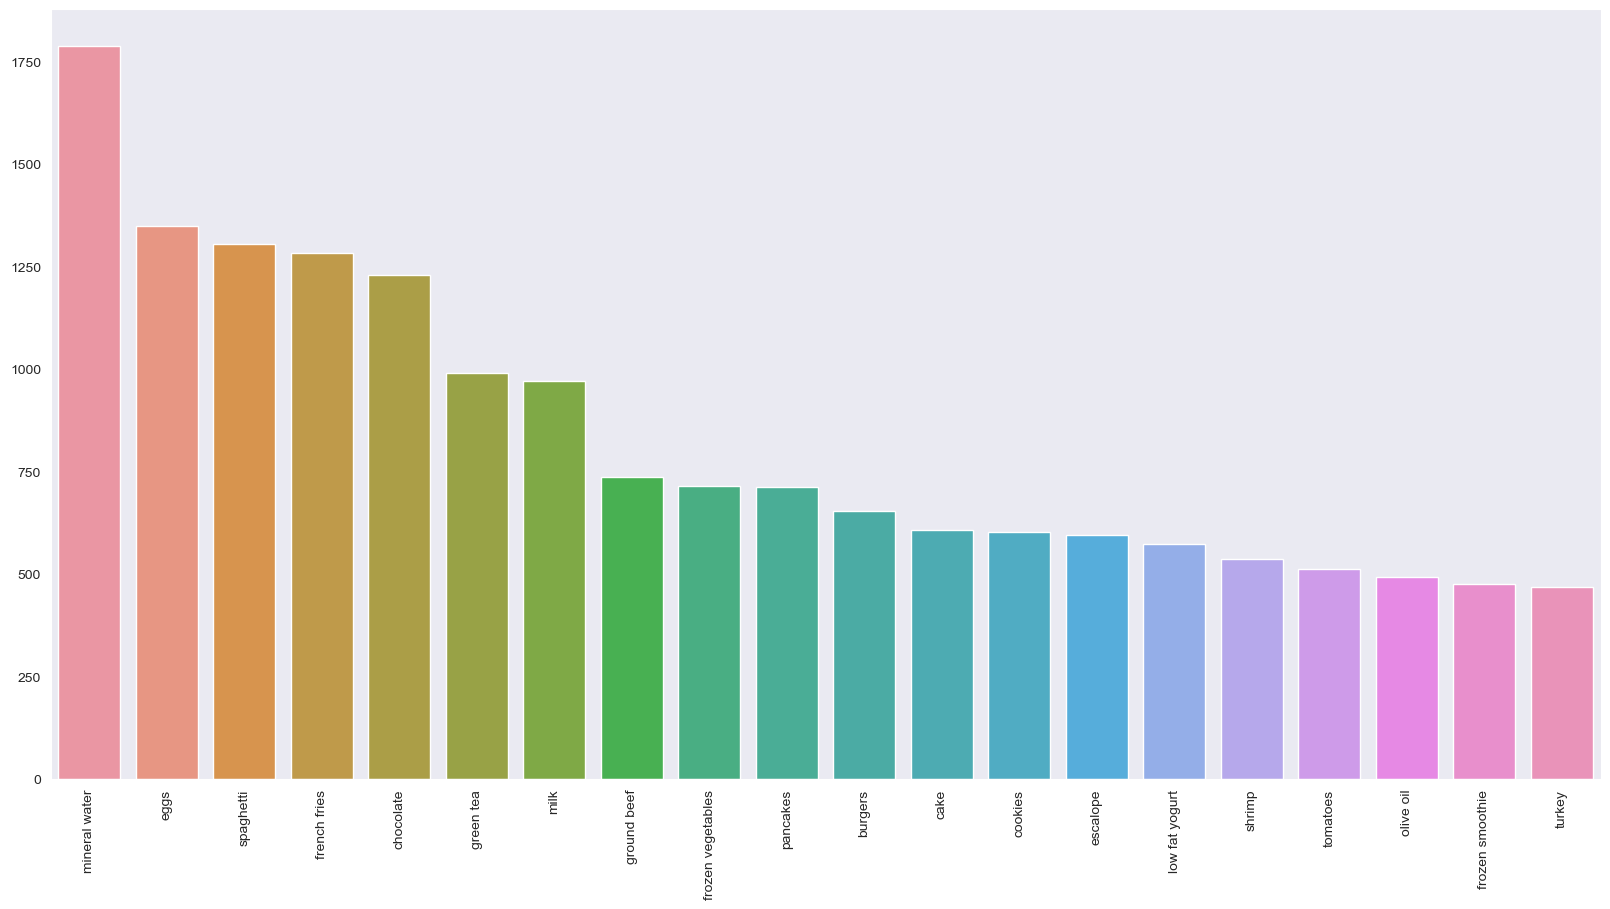

In [22]:
##Lets consider the top 20 items purchased freequently
r=data.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

In [23]:
#running the fpgrowth algorithm
res=fpgrowth(data,min_support=0.05,use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [25]:
res=association_rules(res,metric="lift",min_threshold=1)

In [26]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


We could observe that {spaghetti}->{mineral water} is mostly like to occur as we can observe it from the lift.